In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## Load CIFAR-10 dataset

In [12]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


## Data augmentation layer

In [14]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

## Defining DNN model
(with batch normalization and dropout)

In [16]:
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [17]:
# compiling
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Training the model

In [18]:
history = model.fit(x_train, y_train, epochs=25,
                    validation_data=(x_test, y_test),
                    batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 318s 397ms/step - accuracy: 0.3498 - loss: 2.1329 - val_accuracy: 0.4636 - val_loss: 1.5938
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 319s 394ms/step - accuracy: 0.5233 - loss: 1.3431 - val_accuracy: 0.5805 - val_loss: 1.2221
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 309s 395ms/step - accuracy: 0.5826 - loss: 1.1733 - val_accuracy: 0.6279 - val_loss: 1.0809
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 322s 412ms/step - accuracy: 0.6231 - loss: 1.0674 - val_accuracy: 0.6518 - val_loss: 1.0183
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 373s 400ms/step - accuracy: 0.6444 - loss: 1.0129 - val_accuracy: 0.6594 - val_loss: 1.0083
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 309s 395ms/step - accuracy: 0.6638 - loss: 0.9607 - val_accuracy: 0.6672 - val_loss: 1.0029
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 328s 402ms/step - accuracy: 0.6772 - loss: 0.9216 - val_accuracy: 0.7035 - val_loss: 0.8523
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 324s 404ms/step - accuracy: 0.6817 -

## Evaluating on test set

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 13s - 41ms/step - accuracy: 0.7157 - loss: 0.8387
Test accuracy: 0.7156999707221985


In [21]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test.flatten()
print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1000
           1       0.84      0.85      0.85      1000
           2       0.76      0.51      0.61      1000
           3       0.68      0.42      0.52      1000
           4       0.63      0.71      0.67      1000
           5       0.74      0.55      0.63      1000
           6       0.54      0.93      0.68      1000
           7       0.80      0.79      0.80      1000
           8       0.87      0.78      0.83      1000
           9       0.65      0.90      0.76      1000

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.71     10000
weighted avg       0.74      0.72      0.71     10000



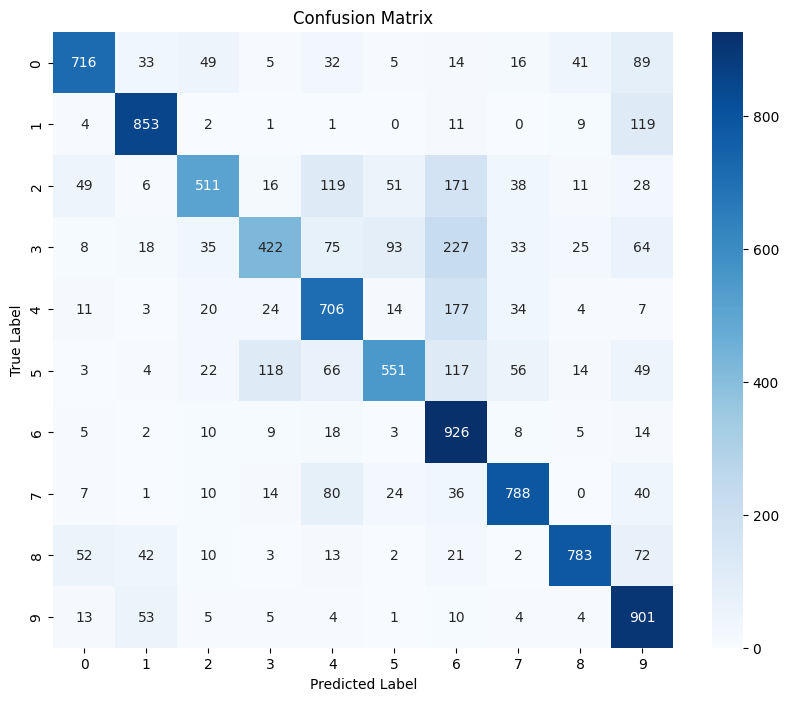

In [22]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

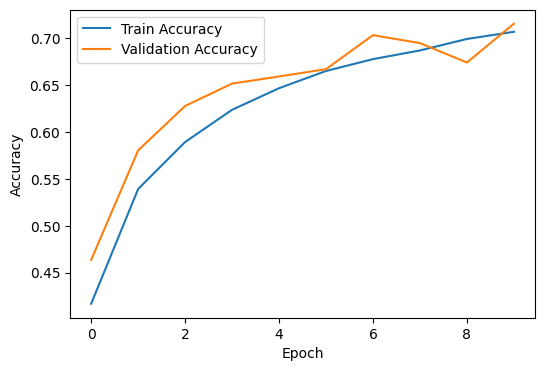

In [23]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()